
## 1. Project Structure and Documentation

### Code Structure Design

Design the overall structure of your project code, following these specific requirements:

**Required Code Organization:**
- Implement core functionality in Python scripts (`.py` files), not notebooks
- Use Jupyter notebooks **only** for data analysis, visualization, and demonstrating results
- Create a modular structure with clear separation of concerns
- Ensure models can be trained via scripts (not requiring notebook execution)
- Implement a command-line interface for running your core functionality

**Directory Structure Requirements:**
- `/src/` - All source code modules and scripts
- `/notebooks/` - Jupyter notebooks for analysis and visualization
- `/data/` - Data files (or documentation of data sources if too large)
- `/tests/` - Unit tests for your implementation
- `/docs/` - Documentation files
- `/results/` - Generated outputs (figures, model checkpoints, etc.)

Create a `README.md` for each directory explaining its purpose and contents.

Provide a diagram or textual description of your code structure below.

```python

In [ ]:
/handicap_model/          # Root directory
│── /src/                    
    │── README_src.md    
│   ├── model.py              # Defines genetic dynamics and selection
│   ├── simulation.py         # Runs evolutionary simulations
│── /notebooks/      
    │── README_notebooks.md    
    │── hm_analysis.ipynb     # Jupyter notebook for presenting results 
│── /data/ 
    │── README_data.md   
    │── random-gen.py          # Randomly generated initial distribution of genotypes
│── /tests/               
    │── README_tests.md   
│   ├── test_model.py          # Tests model calculations
│   ├── test_simulation.py     # Tests simulations
│── /docs/                     # Documentation
    │── README_docs.md   
│── /results/                 # Output figures, logs
    │── README.md             
    │──results.py             #results

SyntaxError: invalid character '│' (U+2502) (3439714515.py, line 1)



### Documentation Strategy

Develop comprehensive documentation for your project following these guidelines:

**Script Documentation Requirements:**
- Include a header comment block in each `.py` file explaining its purpose
- Document all functions using a consistent style (NumPy or Google docstring format)
- Add inline comments for complex sections of code
- Create a `requirements.txt` file listing all dependencies

**Notebook Documentation Requirements:**
- Include markdown cells explaining the purpose of each analysis step
- Document the reasoning behind visualization choices
- Ensure notebooks can be understood without having to run them
- Add a table of contents at the beginning of each notebook

**Example Documentation:**

```python
# example_module.py
"""
Module for data preprocessing and feature engineering.

This module contains functions for cleaning, transforming, and
preparing data for modeling. It handles missing values, outlier
detection, and feature normalization.

Author: Your Name
Date: March 2025
"""

Got it - done!

## 2. Data/Problem Understanding

### For Algorithm-Focused Projects:

Develop a mathematical foundation for your algorithm:
- Provide the mathematical formulation
- Analyze theoretical properties (stability, convergence, etc.)
- Create simple test cases with known solutions
- Document expected behavior under different conditions



 Here is a mathematical formulation of the model, abstracted from Maynard-Smith's paper:


1. **Survival Advantage of A Allele**  
   - Individuals with **AA** or **Aa** genotypes are **fitter** than those with **aa**.  
   - This means individuals carrying the **A** allele (in either homozygous or heterozygous form) have a higher probability of surviving to breed.

2. **Handicap in Males (B Allele)**  
   - Males with **BB** or **Bb** genotypes possess a **handicap**, such as a long tail (like in peacocks).  
   - **bb males** do not have this handicap and are **more likely to survive**.  
   - The **B gene is not expressed in females**.

3. **Mate Selection by C Allele**  
   - **CC and Cc females** will **only** mate with **B males**.  
   - **cc females** are unselective and mate with males in the proportions in which they occur in the adult population.  
   - The **C gene is not expressed in males**.

#### **Survival Probabilities by Genotype**
The fitness effects of genes **A** and **B** on survival probability are:

| Genotype | Fitness of Females | Fitness of Males |
|----------|-------------------|------------------|
| `AAB` or `AaB` | 1 | \(1 - t\) |
| `AAbb` or `Aabb` | 1 | \(1 - s\) |
| `aaB` | 1 | \((1 - s)(1 - ut)\) |
| `aabb` | \(1 - s\) | \(1 - s\) |

### Theoretical Properties
The theoretical property of greatest interest is the fate of the B allele. John Maynard-Smith, in his original paper, claimed that the handicap process cannot work, because the B allele goes to extinction, instead of fixation. 

### Simple test cases with known solution
One simple test case could be a situation where only one genotype occurs in the population--for example, only AAB. In this case, there should be no change, as the model doesn't have parameters built in for mutation. According to the fitness values above, there would in fact be no change.

### Document expected behavior under different conditions:
Per the results in Maynard-Smith's original paper, I expect that if the initial frequency of C is large, then handicap will increase. I also expect that if C is small, then B males will go to extinction, also per the conclusions of Maynard-Smith's paper. 

## Implementation Plan

Outline your approach to implementing your data processing pipeline or algorithm:
- Identify key steps and dependencies
- Determine preprocessing requirements
- Plan computational strategies
- Consider efficiency and optimization approaches

Key steps and dependencies:
The steps I need are - 
1. Generate an initial population, with a randomly chosen distribution of genotype frequencies.
2. Apply the fitness values to obtain the next generation.
3. Repeat
4. Observe behavior of the model after a series 

Preprocessing Requirements:

I should ensure that the inputs are valid--i.e. that the coefficients are between 0 and 1, and that the complementary allele frequencies (e.g. A and a) sum to 1.

Computational Strategies:

I'll deal with numpy arrays instead of lists where possible, for their increased flexibilit and efficiency.

Efficiency/optimiaation approaches:

N/A: I'm using a relatively small amount of generated data, so efficiency is unlikely to be a major concern.


# 3. Test Case Design

Design a comprehensive testing approach for your project:
- Identify critical functionality that requires testing
- Create test cases with expected inputs and outputs
- Include edge cases and boundary conditions
- Document how each test validates specific aspects of your implementation

Two functionalities that require testing are the following: 

(1) The assignment of fitness values for each genotype.

(2) The assignment of mating probabilities.

In [26]:
#This section was generated with assistance from ChatGPT (version 3.5, on March 23rd, 2025).

import unittest
import numpy as np

class TestHandicapModel(unittest.TestCase):

#Fitness values
    def setUp(self):
        """Set up a HandicapModel instance before each test."""
        self.model = HandicapModel(s=0.1, t=0.2, u=0.3)

    def test_fitness_values(self):
        """Test if fitness function returns correct values."""
        self.assertEqual(self.model.fitness("AAB"), (1, 0.8))  # 1 - t
        self.assertEqual(self.model.fitness("aaB"), (1, (1 - 0.1) * (1 - 0.3 * 0.2)))
        self.assertEqual(self.model.fitness("aabb"), (0.9, 0.9))  # 1 - s

    def test_invalid_fitness_input(self):
        """Ensure invalid genotypes raise an error."""
        with self.assertRaises(ValueError):
            self.model.fitness("XYZ")  # Invalid input

# Mating probabilities
    def test_mating_probabilities(self):
        """Test if CC and Cc females select only B males."""
        male_genotypes = ["AAB", "AAbb", "AaB", "aaB", "aabb"]
        
        # CC females must only select B males
        expected_selection = {"AAB": 1, "AaB": 1, "aaB": 1, "AAbb": 0, "aabb": 0}
        self.assertEqual(self.model.mating_probabilities("CC", male_genotypes), expected_selection)
        
        # cc females must select in proportion
        random_selection = self.model.mating_probabilities("cc", male_genotypes)
        self.assertEqual(sum(random_selection.values()), 1.0)  # Probabilities must sum to 1

What about an edge case? Here, let's write a test for t = 1, i.e., where the handicap is fatal.

In [28]:
#This section was generated with assistance from ChatGPT (version 3.5, on March 23rd, 2025).

import unittest
import numpy as np

class TestHandicapModel(unittest.TestCase):

#Fitness values
    def setUp(self):
        """Set up a HandicapModel instance before each test."""
        self.model = HandicapModel(s=0.1, t=1, u=0.3)

    def test_fitness_values(self):
        """Test if fitness function returns correct values."""
        self.assertEqual(self.model.fitness("AAB"), (1, 0.8))  # 1 - t
        self.assertEqual(self.model.fitness("aaB"), (1, (1 - 0.1) * (1 - 0.3 * 0.2)))
        self.assertEqual(self.model.fitness("aabb"), (0.9, 0.9))  # 1 - s

    def test_invalid_fitness_input(self):
        """Ensure invalid genotypes raise an error."""
        with self.assertRaises(ValueError):
            self.model.fitness("XYZ")  # Invalid input

# Mating probabilities
    def test_mating_probabilities(self):
        """Test if CC and Cc females select only B males."""
        male_genotypes = ["AAB", "AAbb", "AaB", "aaB", "aabb"]
        
        # CC females must only select B males
        expected_selection = {"AAB": 1, "AaB": 1, "aaB": 1, "AAbb": 0, "aabb": 0}
        self.assertEqual(self.model.mating_probabilities("CC", male_genotypes), expected_selection)
        
        # cc females must select in proportion
        random_selection = self.model.mating_probabilities("cc", male_genotypes)
        self.assertEqual(sum(random_selection.values()), 1.0)  # Probabilities must sum to 1


## How does each test case validate specific aspects of the implementation?

Testing the fitness values ensures that they've been assigned as the model wants--e.g. the fitness values for AAB should be 1, and 1-t (for, respectively, females and males). 

Meanwhile, testing the mating probabilities ensures that C females are only mating with B males. 


# 4. Initial Implementation

### Core Functionality Implementation

Implement the foundational components of your project:

**For Algorithm-Focused Projects:**
- Core algorithm implementation
- Parameter handling
- Solution computation for simple cases

In [ ]:
# This seciton was generated with assistance from ChatGPT (version 3.5, on March 23, 2025)

import numpy as np

#Begins by defining a class HandicapModel, with allele frequencies and selection parameters as attributes.
class HandicapModel:
    def __init__(self, p_A=0.5, p_B=0.5, p_C=0.5, s=0.1, t=0.2, u=0.3):
        """Initialize the model with allele frequencies and selection parameters."""
        self.p_A = p_A
        self.p_a = 1 - p_A
        self.p_B = p_B
        self.p_b = 1 - p_B
        self.p_C = p_C
        self.p_c = 1 - p_C
        
        self.s = s  # Selection coefficient for aa
        self.t = t  # Handicap coefficient for B males
        self.u = u  # Interaction coefficient for aaB males

# Defines a method for this class, fitness, according to the math above.
    def fitness(self, genotype):
        """Return the fitness value for a given genotype."""
        if genotype in ['AAB', 'AaB']:
            return (1, 1 - self.t)
        elif genotype in ['AAbb', 'Aabb']:
            return (1, 1 - self.s)
        elif genotype == 'aaB':
            return (1, (1 - self.s) * (1 - self.u * self.t))
        elif genotype == 'aabb':
            return (1 - self.s, 1 - self.s)
        else:
            raise ValueError("Invalid genotype")
    
# Defines another method for the class, mating_probabilities, which 
    def mating_probabilities(self, female_genotype, male_genotypes):
        """Return mating probabilities based on female preference."""
        if female_genotype in ['CC', 'Cc']:
            return {g: 1 if 'B' in g else 0 for g in male_genotypes}
        else:
            return {g: 1 / len(male_genotypes) for g in male_genotypes}
    
# Defines a method "update frequencies" which updates over 1 generation
    def update_frequencies(self):
        """Update allele frequencies over one generation."""
        # Compute genotype frequencies before selection. This part uses the Hardy-Weinberg equation, which assumes random mating
        # (Of course, mating will be non-random with respect to genotype pretty soon, but this describes before selection)
        f_AA = self.p_A ** 2
        f_Aa = 2 * self.p_A * self.p_a
        f_aa = self.p_a ** 2
        f_BB = self.p_B ** 2
        f_Bb = 2 * self.p_B * self.p_b
        f_bb = self.p_b ** 2
        
        # Compute survival rates. This gives tuples for female fitness, male fitness.
        W_AAB, W_AaB = self.fitness("AAB")[1], self.fitness("AaB")[1]
        W_AAbb, W_Aabb = self.fitness("AAbb")[1], self.fitness("Aabb")[1]
        W_aaB, W_aabb = self.fitness("aaB")[1], self.fitness("aabb")[1]
        
        # Mean fitness of the population
        W_bar = (
            f_AA * self.p_B * W_AAB +
            f_Aa * self.p_B * W_AaB +
            f_AA * self.p_b * W_AAbb +
            f_Aa * self.p_b * W_Aabb +
            f_aa * self.p_B * W_aaB +
            f_aa * self.p_b * W_aabb
        )
        
        # Update allele frequencies
        self.p_A = (f_AA * self.p_B + f_Aa * self.p_B) / W_bar
        self.p_a = 1 - self.p_A
        self.p_B = (f_AA * self.p_B * W_AAB + f_Aa * self.p_B * W_AaB) / W_bar
        self.p_b = 1 - self.p_B
    
    def simulate(self, generations=100):
        """Run the model for a given number of generations and track allele changes."""
        history = []
        for _ in range(generations):
            self.update_frequencies()
            history.append((self.p_A, self.p_B, self.p_C))
        return np.array(history)



### Visualization and Analysis

Create visualizations to analyze your initial results:
- Generate plots that illustrate key findings or algorithm behavior
- Analyze the performance or characteristics of your implementation
- Document insights gained from these visualizations


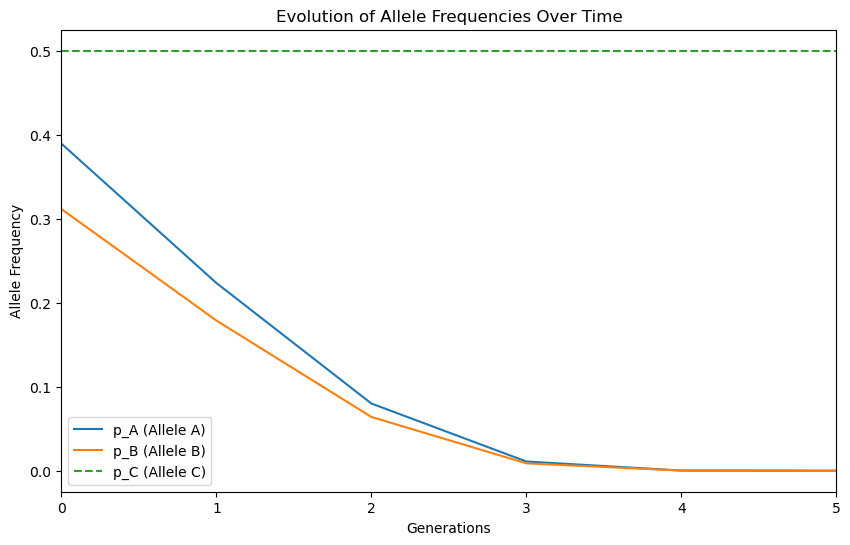

In [ ]:
import matplotlib.pyplot as plt

# Initialize the model with some starting parameters
model = HandicapModel(p_A=0.6, p_B=0.4, p_C=0.5, s=0.1, t=0.2, u=0.3)

# Run the simulation
generations = 200

#Assigns a name "history" to the output of the simulation over 200 generations
history = model.simulate(generations)

# Extracts allele frequencies; returns an array with one line per generation, and three columns corresponding to allele frequencies
p_A_values, p_B_values, p_C_values = history[:, 0], history[:, 1], history[:, 2]

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(range(generations), p_A_values, label='p_A (Allele A)')
plt.plot(range(generations), p_B_values, label='p_B (Allele B)')
plt.plot(range(generations), p_C_values, label='p_C (Allele C)', linestyle='dashed')
plt.xlabel("Generations")

# Maynard Smith's original model was investigated after just 5 generations.
plt.xlim(0,5)

plt.ylabel("Allele Frequency")
plt.title("Evolution of Allele Frequencies Over Time")
plt.legend()
plt.show()

Insights gained from visualization:

A claim made in the original paper (but not substantiated with an accompanying figure) was that the trends in allele frequencies were apparent by only 5 generations. This seems to be bourne out by the above visualization.

## 5. Progress Report

### Project Progress Assessment

Evaluate your progress against your original project plan:
- Compare current status to your Gantt chart from HW1
- Identify areas where you're ahead or behind schedule
- Update your timeline based on new understanding
- Document any scope adjustments needed

Compare current status to Gantt chart:
- I'm currently way behind; I had thought I'd have a model implemented by week 6, but I've only just now been able to implement a preliminary version of the model.

Areas where you're ahead or behind schedule:
- I'm behind in all areas.

Updated timeline:
- Have a more fully fleshed-out model by the beginning of April
- Implement tweaks having to do with quantitative traits by the end of april.

Scope adjustments needed: 
- I may not be able to modify the model to handle quantitative traits.


### Course Concept Application

Explain how specific concepts from the course are being applied in your project:

Identify at least 2-3 course topics that directly relate to your implementation
 - Command line interface and scripting (Day 02)
 - Modeling intro (Day 08)

Explain how these concepts informed your approach
- I used CLI to create the directories, and used some of the general ideas we discussed in class to inform the construction of a mathematical model. 

Describe how course materials helped overcome specific challenges

- I had to go back and reference some of my notes from the day we worked on CLI, in order to make a nested set of directories. 

